# PTID-CDS-DEC-24-2228 
# PRCP-1005-Forest Cover Prediction

Problem Statement

Task 1:-Prepare a complete data analysis report on the given data.
Task 2:-Create a predictive model which helps to predict seven different cover types in
four different wilderness areas of the Forest with the best accuracy..

Dataset Link:
The actual forest cover type for a given 30 x 30 meter cell was determined from US
Forest Service (USFS) Region 2 Resource Information System data. Independent
variables were then derived from data obtained from the US Geological Survey and
USFS. The data is in raw form (not scaled) and contains binary columns of data for
qualitative independent variables such as wilderness areas and soil type.
This study area includes four wilderness areas located in the Roosevelt National Forest
of northern Colorado. These areas represent forests with minimal human-caused
disturbances, so that existing forest cover types are more a result of ecological
processes rather than forest management practices.
The goal of the Project is to predict seven different cover types in four different
wilderness areas of the Roosevelt National Forest of Northern Colorado with the
best accuracy.

Link : https://d3ilbtxij3aepc.cloudfront.net/projects/CDS-Capstone-Projects/PRCP-1005-
ForestCoverPred.zip

Data Fields
Elevation - Elevation in meters
Aspect - Aspect in degrees azimuth
Slope - Slope in degrees
Horizontal_Distance_To_Hydrology - Horz Dist to nearest surface water features

Vertical_Distance_To_Hydrology - Vert Dist to nearest surface water features
Horizontal_Distance_To_Roadways - Horz Dist to nearest roadway
Hillshade_9am (0 to 255 index) - Hillshade index at 9am, summer solstice
Hillshade_Noon (0 to 255 index) - Hillshade index at noon, summer solstice
Hillshade_3pm (0 to 255 index) - Hillshade index at 3pm, summer solstice
Horizontal_Distance_To_Fire_Points - Horz Dist to nearest wildfire ignition points
Wilderness_Area (4 binary columns, 0 = absence or 1 = presence) - Wilderness area designation
Soil_Type (40 binary columns, 0 = absence or 1 = presence) - Soil Type designation
Cover_Type (7 types, integers 1 to 7) - Forest Cover Type designation
The wilderness areas are:
1 - Rawah Wilderness Area
2 - Neota Wilderness Area
3 - Comanche Peak Wilderness Area
4 - Cache la Poudre Wilderness Area
The soil types are:
1 Cathedral family - Rock outcrop complex, extremely stony.
2 Vanet - Ratake families complex, very stony.
3 Haploborolis - Rock outcrop complex, rubbly.
4 Ratake family - Rock outcrop complex, rubbly.
5 Vanet family - Rock outcrop complex complex, rubbly.
6 Vanet - Wetmore families - Rock outcrop complex, stony.
7 Gothic family.
8 Supervisor - Limber families complex.
9 Troutville family, very stony.
10 Bullwark - Catamount families - Rock outcrop complex, rubbly.
11 Bullwark - Catamount families - Rock land complex, rubbly.
12 Legault family - Rock land complex, stony.
13 Catamount family - Rock land - Bullwark family complex, rubbly.
14 Pachic Argiborolis - Aquolis complex.
15 unspecified in the USFS Soil and ELU Survey.

16 Cryaquolis - Cryoborolis complex.
17 Gateview family - Cryaquolis complex.
18 Rogert family, very stony.
19 Typic Cryaquolis - Borohemists complex.
20 Typic Cryaquepts - Typic Cryaquolls complex.
21 Typic Cryaquolls - Leighcan family, till substratum complex.
22 Leighcan family, till substratum, extremely bouldery.
23 Leighcan family, till substratum - Typic Cryaquolls complex.
24 Leighcan family, extremely stony.
25 Leighcan family, warm, extremely stony.
26 Granile - Catamount families complex, very stony.
27 Leighcan family, warm - Rock outcrop complex, extremely stony.
28 Leighcan family - Rock outcrop complex, extremely stony.
29 Como - Legault families complex, extremely stony.
30 Como family - Rock land - Legault family complex, extremely stony.
31 Leighcan - Catamount families complex, extremely stony.
32 Catamount family - Rock outcrop - Leighcan family complex, extremely stony.
33 Leighcan - Catamount families - Rock outcrop complex, extremely stony.
34 Cryorthents - Rock land complex, extremely stony.
35 Cryumbrepts - Rock outcrop - Cryaquepts complex.
36 Bross family - Rock land - Cryumbrepts complex, extremely stony.
37 Rock outcrop - Cryumbrepts - Cryorthents complex, extremely stony.
38 Leighcan - Moran families - Cryaquolls complex, extremely stony.
39 Moran family - Cryorthents - Leighcan family complex, extremely stony.
40 Moran family - Cryorthents - Rock land complex, extremely stony.
Target variable: Cover_Type (7 categories)

Model Comparison Report
Create a report stating the performance of multiple models on this data and
suggest the best model for production.
Report on Challenges faced
Create a report which should include challenges you faced on data and
what technique used with proper reason.
Note:-All above tasks have to be created on a single jupyter notebook and
share the same for final submission of the project.

In [5]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.model_selection import learning_curve

In [11]:
pip install python-docx


Note: you may need to restart the kernel to use updated packages.


In [6]:
# Load the dataset
data = pd.read_csv(r"C:\Users\Admin\Documents\CDS PROJECT\FOREST_COVER_PREDICTION\train.csv")

# Display the first few rows of the dataframe
data.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


In [7]:
data

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15115,15116,2607,243,23,258,7,660,170,251,214,...,0,0,0,0,0,0,0,0,0,3
15116,15117,2603,121,19,633,195,618,249,221,91,...,0,0,0,0,0,0,0,0,0,3
15117,15118,2492,134,25,365,117,335,250,220,83,...,0,0,0,0,0,0,0,0,0,3
15118,15119,2487,167,28,218,101,242,229,237,119,...,0,0,0,0,0,0,0,0,0,3


In [8]:
# Checking for missing values in the dataset
missing_values = data.isnull().sum()

# Display missing values if any
missing_values[missing_values > 0]

Series([], dtype: int64)

In [9]:
# Checking the data types of all columns
data_types = data.dtypes

# Display the data types
data_types

Id                                    int64
Elevation                             int64
Aspect                                int64
Slope                                 int64
Horizontal_Distance_To_Hydrology      int64
Vertical_Distance_To_Hydrology        int64
Horizontal_Distance_To_Roadways       int64
Hillshade_9am                         int64
Hillshade_Noon                        int64
Hillshade_3pm                         int64
Horizontal_Distance_To_Fire_Points    int64
Wilderness_Area1                      int64
Wilderness_Area2                      int64
Wilderness_Area3                      int64
Wilderness_Area4                      int64
Soil_Type1                            int64
Soil_Type2                            int64
Soil_Type3                            int64
Soil_Type4                            int64
Soil_Type5                            int64
Soil_Type6                            int64
Soil_Type7                            int64
Soil_Type8                      

# Preprocessing

In [10]:

label_encoder = LabelEncoder()
data['Cover_Type'] = label_encoder.fit_transform(data['Cover_Type'])
data.head()                                               

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,4
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,4
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,1
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,1
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,4


In [11]:

# Initialize the StandardScaler
scalar = StandardScaler()
num_data = data[["Elevation","Aspect","Slope","Horizontal_Distance_To_Hydrology","Vertical_Distance_To_Hydrology","Horizontal_Distance_To_Roadways","Horizontal_Distance_To_Fire_Points"]]
cat_data = data.drop(["Elevation","Aspect","Slope","Horizontal_Distance_To_Hydrology","Vertical_Distance_To_Hydrology","Horizontal_Distance_To_Roadways","Horizontal_Distance_To_Fire_Points"],axis=1)
scaled_data = scalar.fit_transform(num_data)
num_data1 = pd.DataFrame(scaled_data,columns=num_data.columns)
scaled_data = pd.concat([num_data1,cat_data],axis=1)

In [12]:
scaled_data

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Horizontal_Distance_To_Fire_Points,Id,Hillshade_9am,Hillshade_Noon,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,-0.367095,-0.959980,-1.597132,0.146639,-0.834074,-0.908681,4.334805,1,221,232,...,0,0,0,0,0,0,0,0,0,4
1,-0.381461,-0.914559,-1.715424,-0.072337,-0.932054,-0.999246,4.285710,2,220,235,...,0,0,0,0,0,0,0,0,0,4
2,0.130912,-0.160577,-0.887379,0.194243,0.227369,1.106379,4.191156,3,234,238,...,0,0,0,0,0,0,0,0,0,1
3,0.085421,-0.015231,0.177250,0.070474,1.092853,1.038455,4.272981,4,238,238,...,0,0,0,0,0,0,0,0,0,1
4,-0.369489,-1.014485,-1.715424,-0.353198,-0.850404,-0.998491,4.237524,5,220,234,...,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15115,-0.340758,0.784172,0.768711,0.146639,-0.719765,-0.795476,-0.208335,15116,170,251,...,0,0,0,0,0,0,0,0,0,2
15116,-0.350335,-0.324091,0.295543,1.931773,2.350255,-0.827173,-0.169240,15117,249,221,...,0,0,0,0,0,0,0,0,0,2
15117,-0.616099,-0.205998,1.005295,0.655997,1.076523,-1.040755,-0.294706,15118,250,220,...,0,0,0,0,0,0,0,0,0,2
15118,-0.628070,0.093779,1.360172,-0.043775,0.815245,-1.110942,-0.526545,15119,229,237,...,0,0,0,0,0,0,0,0,0,2


# Visualization


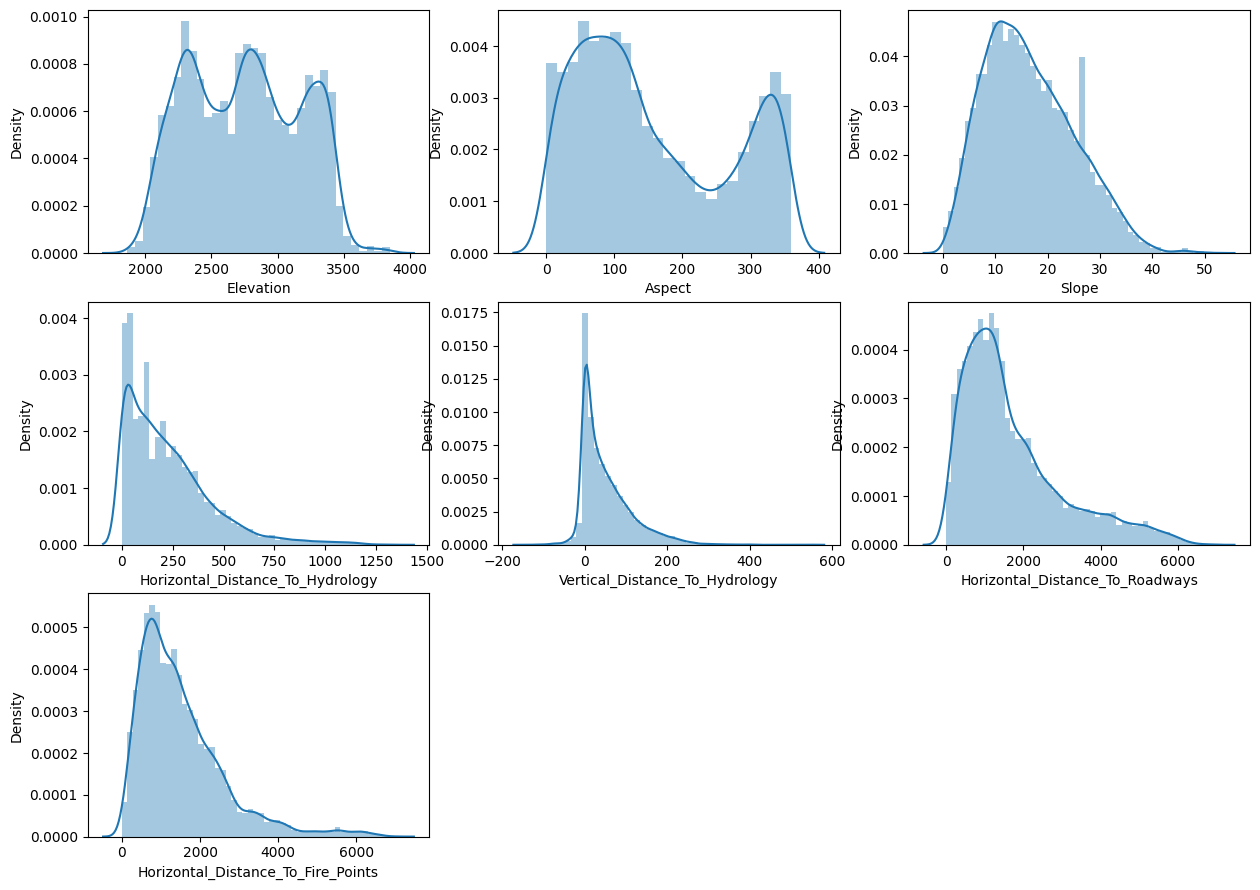

In [13]:

plt.figure(figsize=(15,60), facecolor='white')
plotnumber =1

for column in num_data:
    ax = plt.subplot(16,3,plotnumber)
    sns.distplot(num_data[column])
    plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

# SKEWNESS


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55],
 [Text(0, 0, 'Id'),
  Text(1, 0, 'Elevation'),
  Text(2, 0, 'Aspect'),
  Text(3, 0, 'Slope'),
  Text(4, 0, 'Horizontal_Distance_To_Hydrology'),
  Text(5, 0, 'Vertical_Distance_To_Hydrology'),
  Text(6, 0, 'Horizontal_Distance_To_Roadways'),
  Text(7, 0, 'Hillshade_9am'),
  Text(8, 0, 'Hillshade_Noon'),
  Text(9, 0, 'Hillshade_3pm'),
  Text(10, 0, 'Horizontal_Distance_To_Fire_Points'),
  Text(11, 0, 'Wilderness_Area1'),
  Text(12, 0, 'Wilderness_Area2'),
  Text(13, 0, 'Wilderness_Area3'),
  Text(14, 0, 'Wilderness_Area4'),
  Text(15, 0, 'Soil_Type1'),
  Text(16, 0, 'Soil_Type2'),
  Text(17, 0, 'Soil_Type3'),
  Text(18, 0, 'Soil_Type4'),
  Text(19, 0, 'Soil_Type5'),


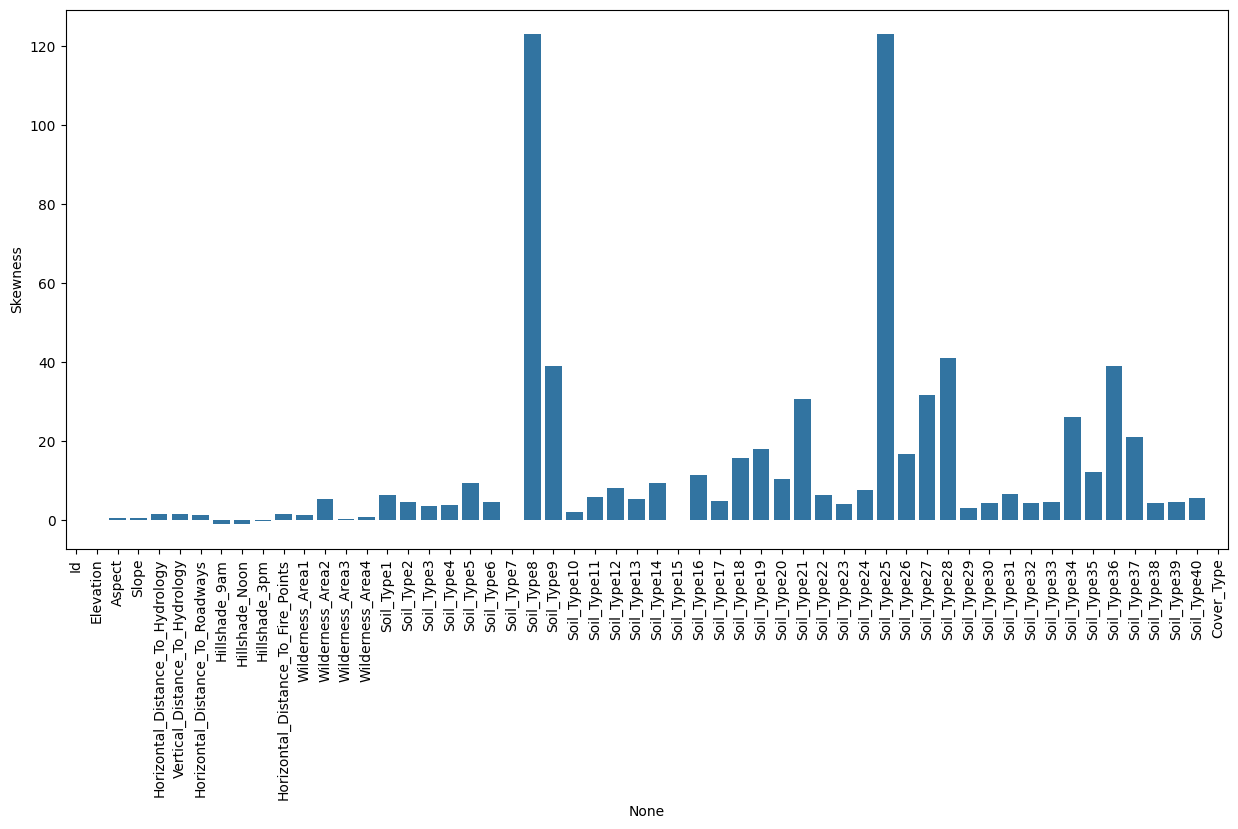

In [14]:
skew=data.skew()
skew_df=pd.DataFrame(skew,index=None,columns=['Skewness'])
plt.figure(figsize=(15,7))
sns.barplot(x=skew_df.index,y='Skewness',data=skew_df)
plt.xticks(rotation=90)

<Axes: xlabel='Cover_Type', ylabel='Size'>

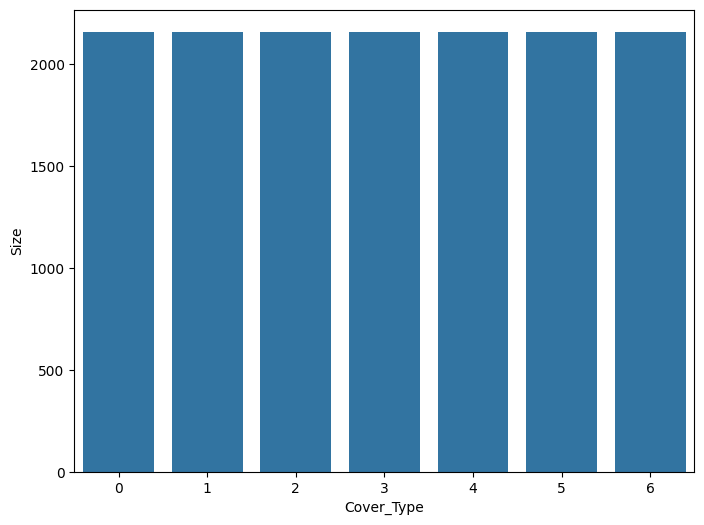

In [15]:
class_dist=data.groupby('Cover_Type').size()
class_label=pd.DataFrame(class_dist,columns=['Size'])
plt.figure(figsize=(8,6))
sns.barplot(x=class_label.index,y='Size',data=class_label)

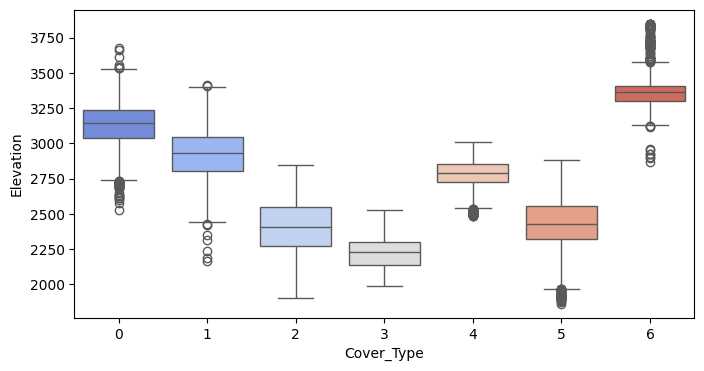

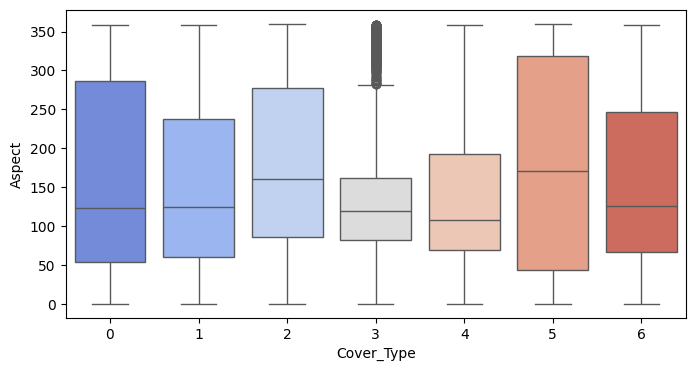

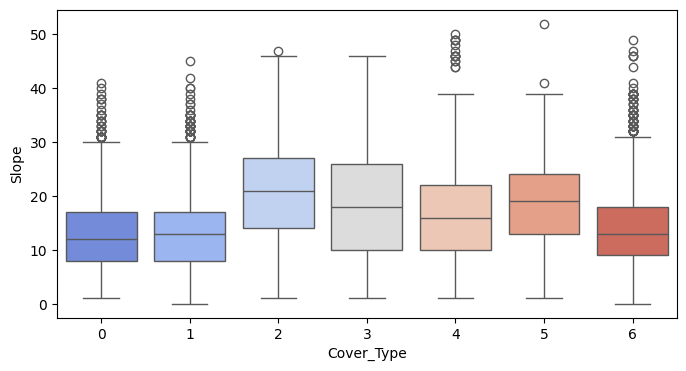

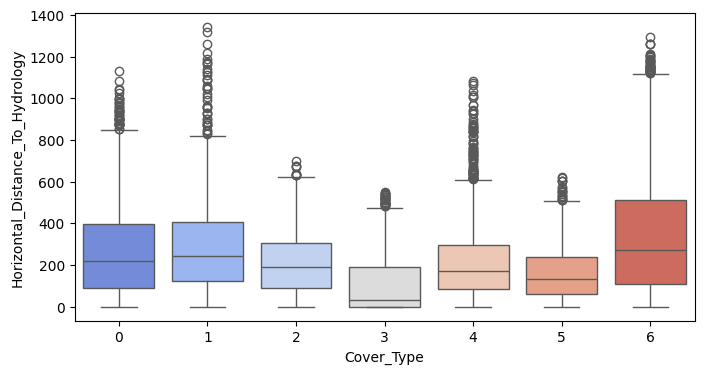

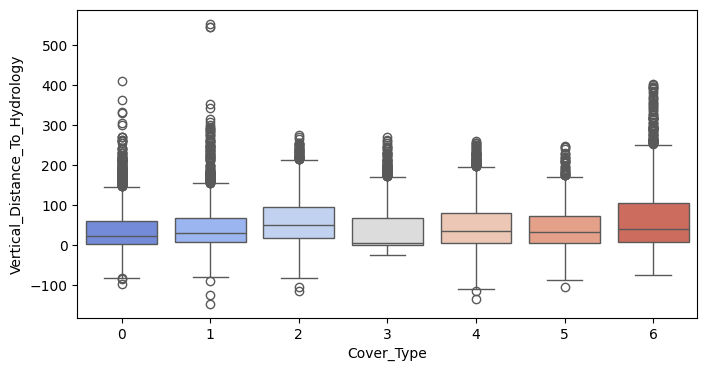

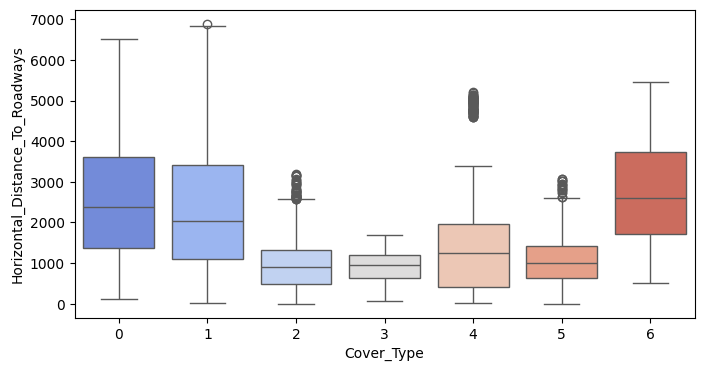

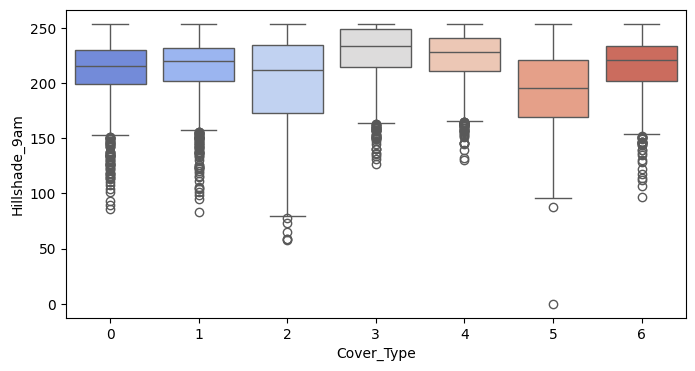

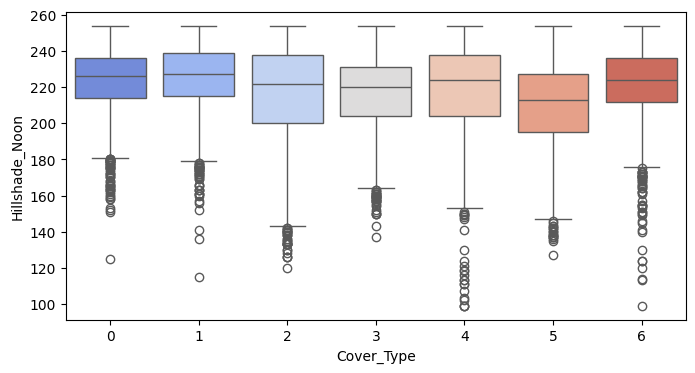

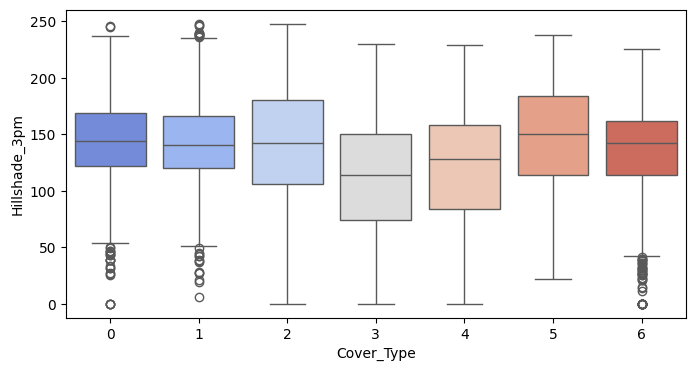

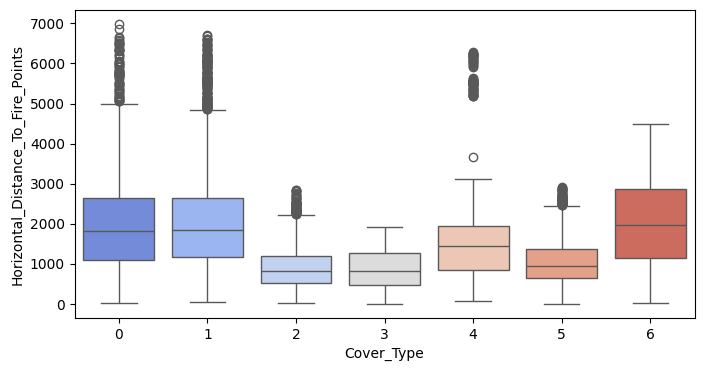

In [16]:
cont_data=data.loc[:,'Elevation':'Horizontal_Distance_To_Fire_Points']
data['Cover_Type']=data['Cover_Type'].astype('category') #To convert target class into category

for i, col in enumerate(cont_data.columns):
    plt.figure(i,figsize=(8,4))
    sns.boxplot(x=data['Cover_Type'], y=col, data=data, palette="coolwarm")

# Heat_Map

<Axes: >

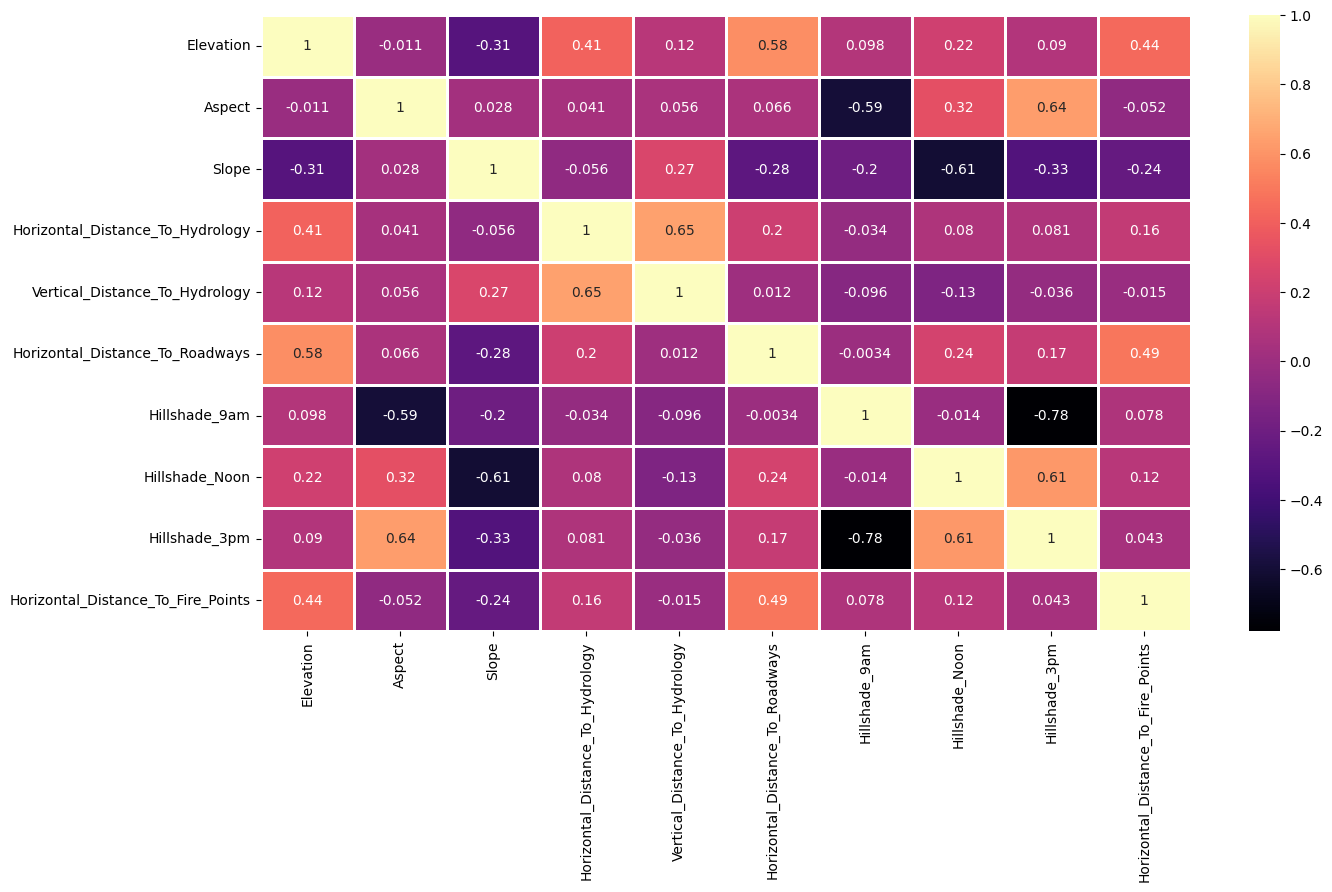

In [17]:
plt.figure(figsize=(15,8))
sns.heatmap(cont_data.corr(),cmap='magma',linecolor='white',linewidths=1,annot=True)

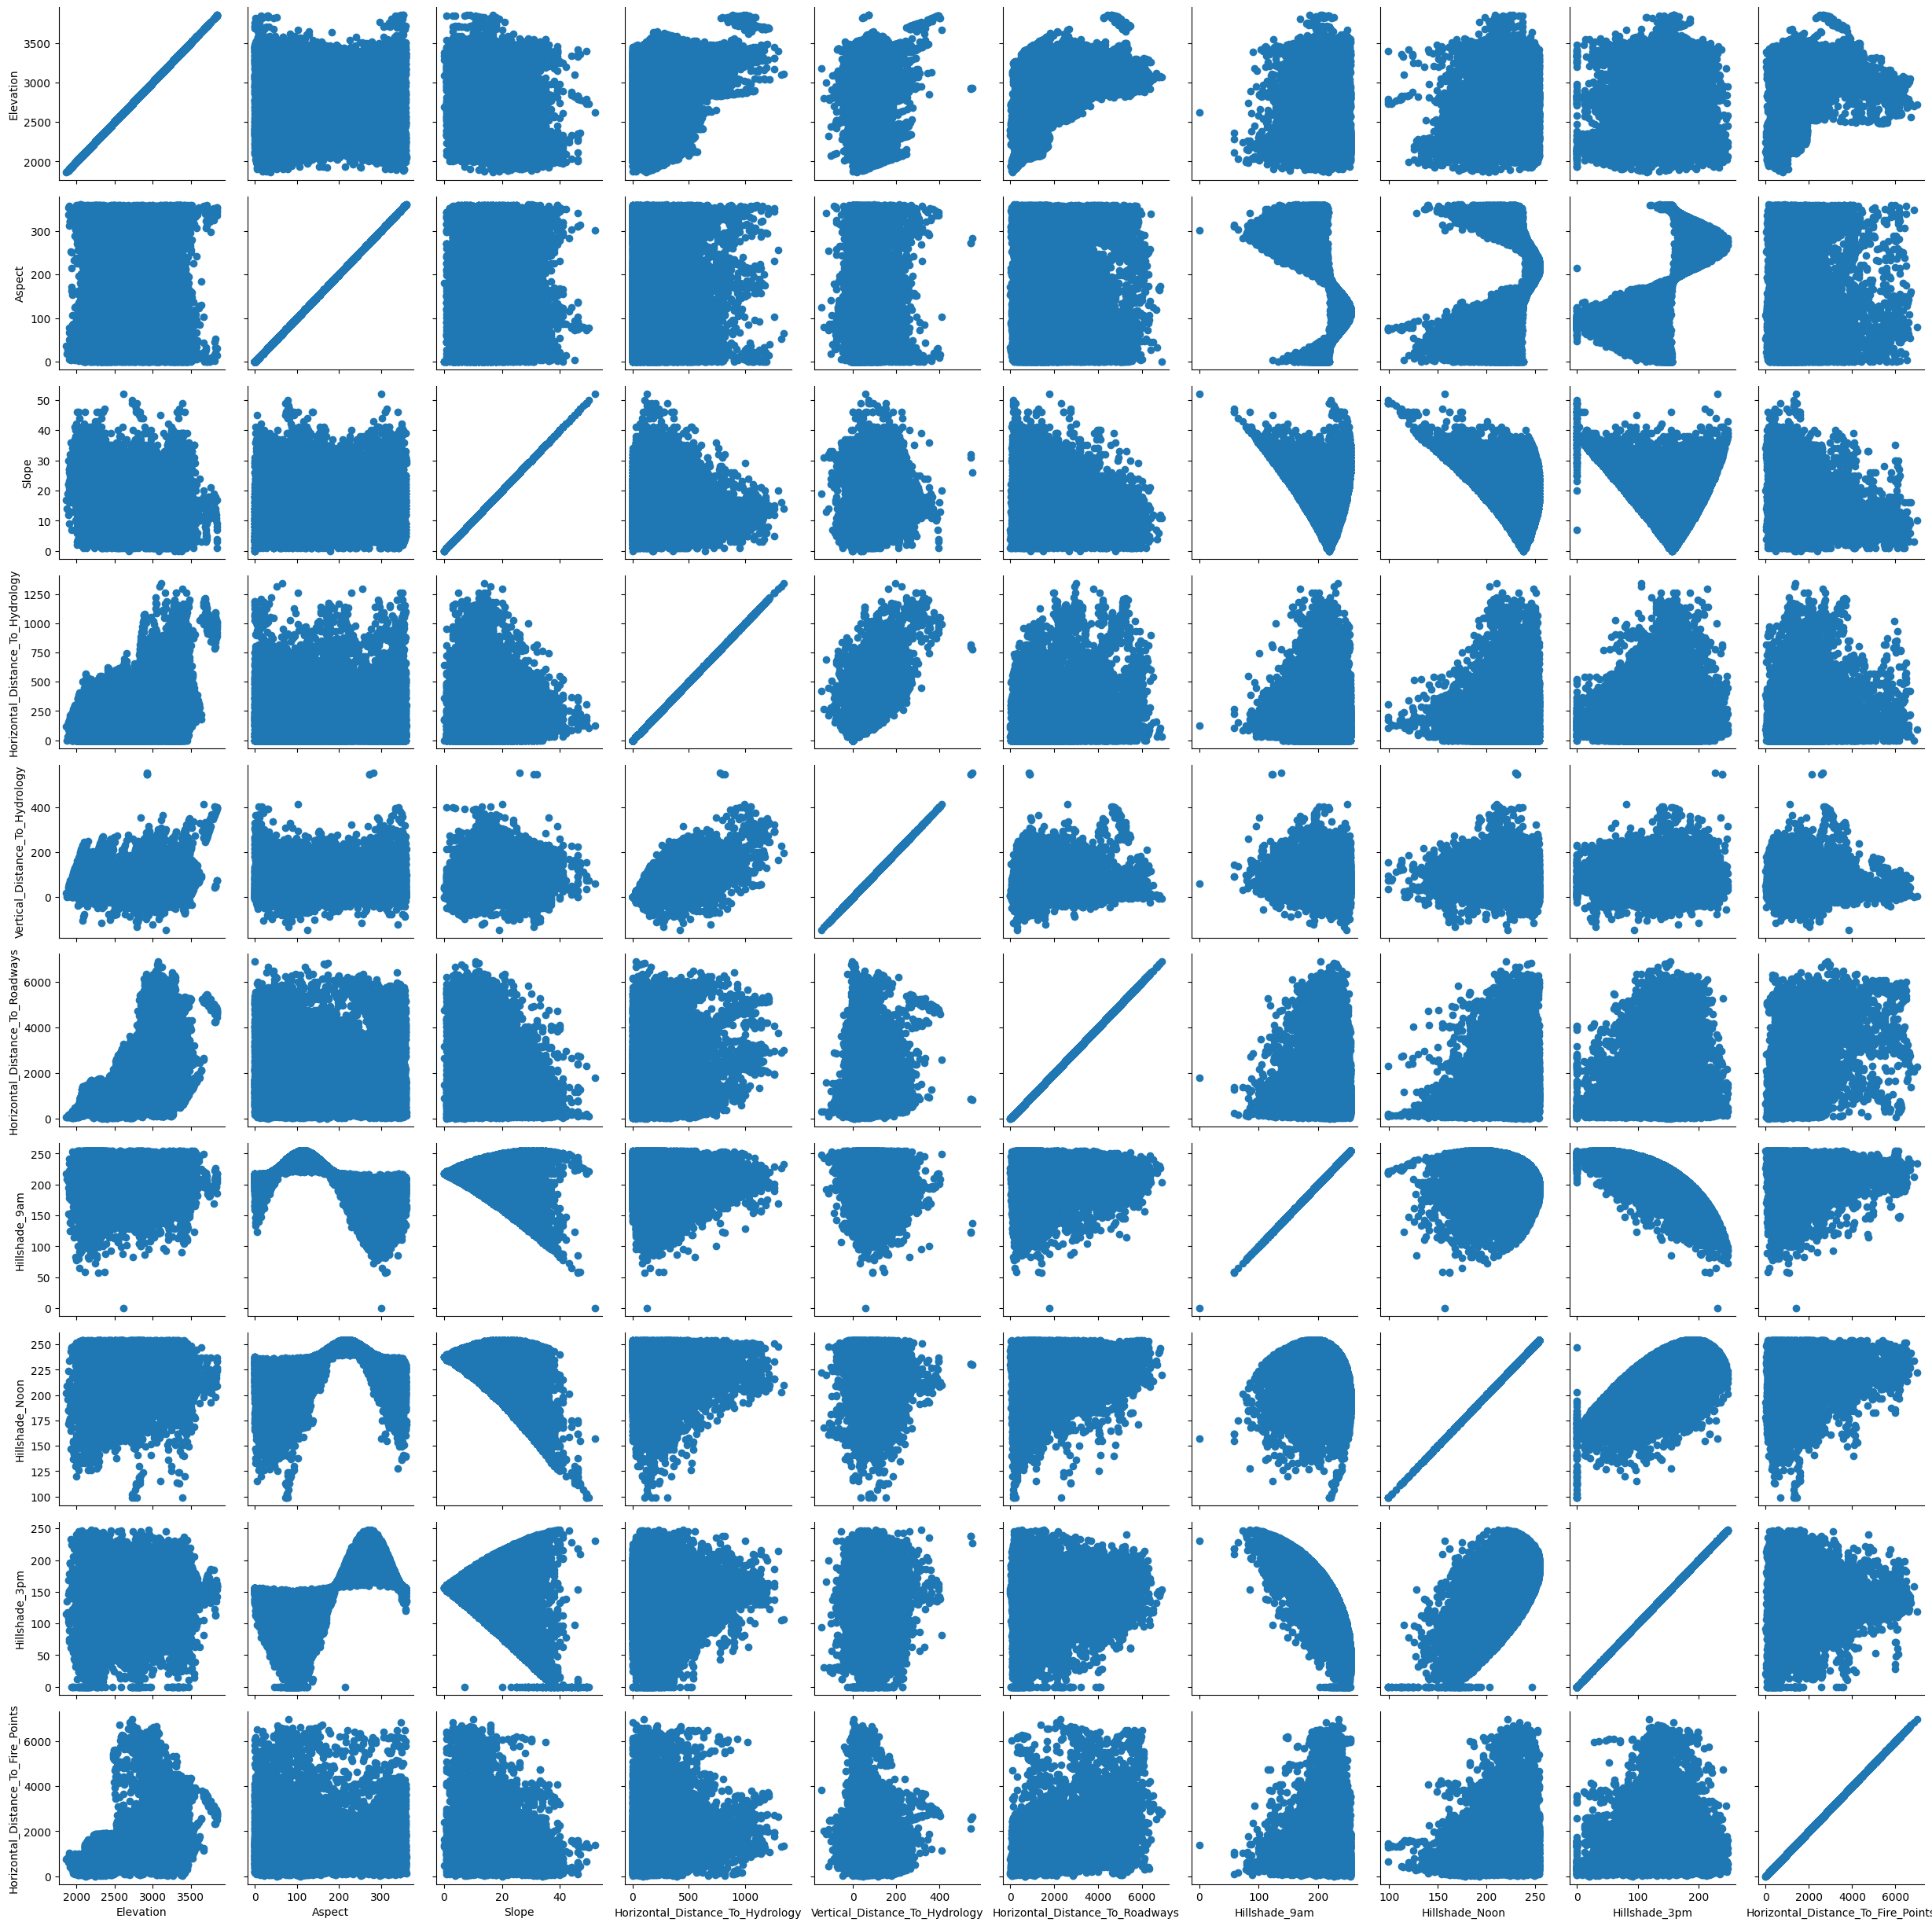

In [18]:
g = sns.PairGrid(cont_data)
g.map(plt.scatter)

# FEATURE SELECTION:

In [19]:
# Define the features and the target variable
X = scaled_data.drop("Cover_Type", axis=1)
y = scaled_data["Cover_Type"]  
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)

[1.51467344e-01 4.47613790e-02 3.70221904e-02 5.36144284e-02
 4.42431021e-02 7.17670194e-02 5.98810486e-02 6.02013323e-02
 4.51108639e-02 4.08396159e-02 4.05817642e-02 2.18916748e-02
 4.46643317e-03 1.85410998e-02 5.74333478e-02 2.37680240e-03
 8.81022861e-03 2.26710767e-02 1.56873752e-02 1.74747609e-03
 3.64486405e-03 0.00000000e+00 1.18358666e-05 1.89026491e-04
 3.04452887e-02 4.31900187e-03 5.55967024e-03 8.57944937e-03
 2.04186310e-03 0.00000000e+00 1.63727458e-03 1.00180937e-02
 1.18463950e-03 7.65729787e-04 2.12930756e-03 3.73701239e-04
 7.92926891e-03 7.66705718e-03 3.76795035e-03 3.21201727e-05
 8.86157535e-04 2.29050403e-04 2.02122390e-04 6.63299038e-03
 1.23890916e-02 3.54543835e-03 6.09206818e-03 4.61876601e-03
 4.77355582e-04 3.88292639e-03 2.25811608e-04 1.21334614e-03
 2.52320172e-02 2.56471114e-02 1.53140017e-02]


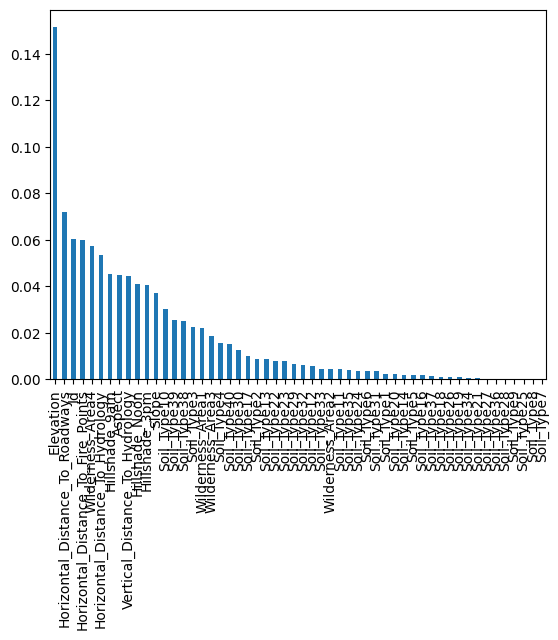

In [20]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(54).plot(kind='bar')
plt.show()

In [21]:
top_9_features = feat_importances.nlargest(54)
selected_columns = data[top_9_features.index]
selected_columns

,Elevation,Horizontal_Distance_To_Roadways,Id,Horizontal_Distance_To_Fire_Points,Wilderness_Area4,Horizontal_Distance_To_Hydrology,Hillshade_9am,Aspect,Vertical_Distance_To_Hydrology,Hillshade_Noon,...,Soil_Type19,Soil_Type34,Soil_Type21,Soil_Type27,Soil_Type36,Soil_Type28,Soil_Type9,Soil_Type25,Soil_Type8,Soil_Type7
0,2596,510,1,6279,0,258,221,51,0,232,...,0,0,0,0,0,0,0,0,0,0
1,2590,390,2,6225,0,212,220,56,-6,235,...,0,0,0,0,0,0,0,0,0,0
2,2804,3180,3,6121,0,268,234,139,65,238,...,0,0,0,0,0,0,0,0,0,0
3,2785,3090,4,6211,0,242,238,155,118,238,...,0,0,0,0,0,0,0,0,0,0
4,2595,391,5,6172,0,153,220,45,-1,234,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15115,2607,660,15116,1282,0,258,170,243,7,251,...,0,0,0,0,0,0,0,0,0,0
15116,2603,618,15117,1325,0,633,249,121,195,221,...,0,0,0,0,0,0,0,0,0,0
15117,2492,335,15118,1187,0,365,250,134,117,220,...,0,0,0,0,0,0,0,0,0,0
15118,2487,242,15119,932,0,218,229,167,101,237,...,0,0,0,0,0,0,0,0,0,0


In [22]:
X=scaled_data.drop("Cover_Type",axis=1)
y=scaled_data["Cover_Type"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Check the shape of the resulting sets
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((12096, 55), (3024, 55), (12096,), (3024,))

# XGBoost

In [23]:

import xgboost as xgb
tree1= xgb.XGBClassifier()
tree1.fit(X_train, y_train)
y_pred0 = tree1.predict(X_test)



In [24]:
from sklearn import metrics
report0=classification_report(y_test,y_pred0)
print(report0)


              precision    recall  f1-score   support

           0       0.79      0.77      0.78       421
           1       0.79      0.70      0.74       438
           2       0.89      0.87      0.88       428
           3       0.95      0.98      0.96       449
           4       0.89      0.95      0.92       416
           5       0.89      0.91      0.90       432
           6       0.94      0.98      0.96       440

    accuracy                           0.88      3024
   macro avg       0.88      0.88      0.88      3024
weighted avg       0.88      0.88      0.88      3024



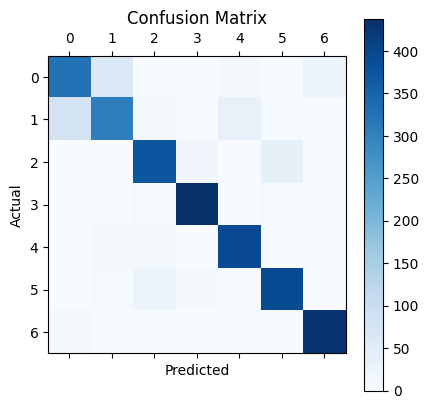

In [25]:
# Create the confusion matrix
matrix = confusion_matrix(y_test,y_pred0)
# Plot the confusion matrix
plt.matshow(matrix, cmap='Blues')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Random Forest

In [26]:


# Initialize Gaussian Naive Bayes since our features are continuous after standardization
nb_model = RandomForestClassifier()

# Train the model
nb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred1 = nb_model.predict(X_test)



In [27]:

report = classification_report(y_test,y_pred1)
print(report)


              precision    recall  f1-score   support

           0       0.79      0.79      0.79       421
           1       0.82      0.71      0.76       438
           2       0.87      0.85      0.86       428
           3       0.93      0.98      0.95       449
           4       0.89      0.95      0.92       416
           5       0.88      0.90      0.89       432
           6       0.95      0.97      0.96       440

    accuracy                           0.88      3024
   macro avg       0.88      0.88      0.88      3024
weighted avg       0.88      0.88      0.88      3024



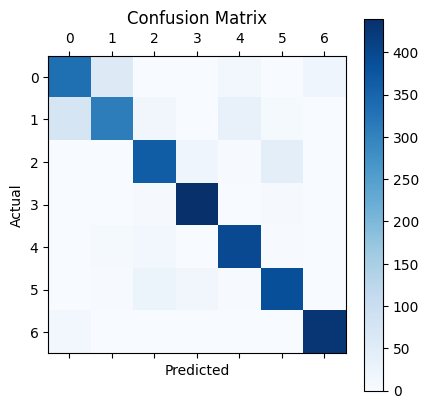

In [28]:
# Create the confusion matrix
matrix = confusion_matrix(y_test,y_pred1)
# Plot the confusion matrix
plt.matshow(matrix, cmap='Blues')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# KNN

In [29]:


# Initialize Gaussian Naive Bayes since our features are continuous after standardization
knn = KNeighborsClassifier()

# Train the model
knn.fit(X_train,y_train)

# Make predictions on the test set
y_pred2 = knn.predict(X_test)




In [30]:
report1=classification_report(y_test,y_pred2)
print(report1)


              precision    recall  f1-score   support

           0       0.44      0.42      0.43       421
           1       0.52      0.44      0.48       438
           2       0.49      0.46      0.47       428
           3       0.67      0.81      0.74       449
           4       0.57      0.66      0.61       416
           5       0.59      0.54      0.57       432
           6       0.63      0.60      0.62       440

    accuracy                           0.56      3024
   macro avg       0.56      0.56      0.56      3024
weighted avg       0.56      0.56      0.56      3024



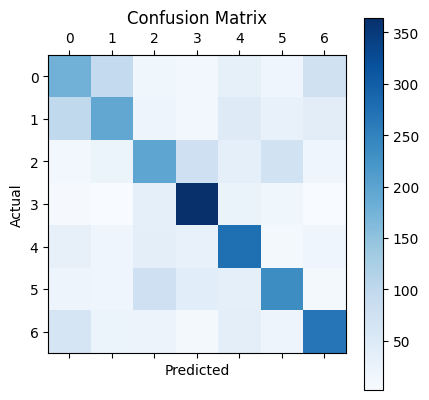

In [31]:
# Create the confusion matrix
matrix = confusion_matrix(y_test, y_pred2)
# Plot the confusion matrix
plt.matshow(matrix, cmap='Blues')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Logistic Regression

In [32]:

# Create the logistic regression model
model = LogisticRegression()

# Fit the model to the data
model.fit(X_train, y_train)

# Make predictions
y_pred3 = model.predict(X_test)



In [33]:
report2=classification_report(y_test,y_pred3)
print(report2)

              precision    recall  f1-score   support

           0       0.18      0.07      0.10       421
           1       0.22      0.28      0.25       438
           2       0.07      0.00      0.00       428
           3       0.29      0.43      0.35       449
           4       0.16      0.09      0.11       416
           5       0.26      0.34      0.29       432
           6       0.21      0.39      0.27       440

    accuracy                           0.23      3024
   macro avg       0.20      0.23      0.20      3024
weighted avg       0.20      0.23      0.20      3024



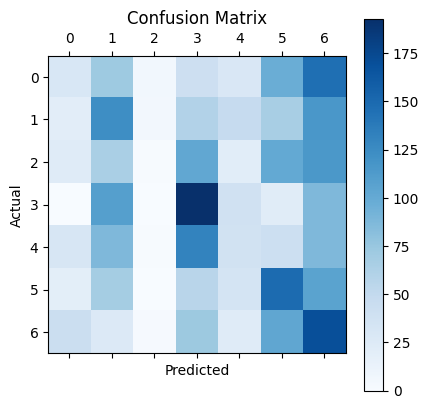

In [34]:
# Create the confusion matrix
matrix = confusion_matrix(y_test, y_pred3)
# Plot the confusion matrix
plt.matshow(matrix, cmap='Blues')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Decision Tree

In [35]:

# Initialize and train the Decision Tree classifier
tree_classifier = DecisionTreeClassifier(min_samples_split=3, max_depth=3)
tree_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred4 = tree_classifier.predict(X_test)



In [36]:
report=classification_report(y_test,y_pred4)
print(report)

              precision    recall  f1-score   support

           0       0.50      0.59      0.54       421
           1       0.00      0.00      0.00       438
           2       0.50      0.42      0.45       428
           3       0.72      0.84      0.78       449
           4       0.52      0.84      0.64       416
           5       0.48      0.49      0.49       432
           6       0.75      0.92      0.82       440

    accuracy                           0.58      3024
   macro avg       0.50      0.58      0.53      3024
weighted avg       0.50      0.58      0.53      3024



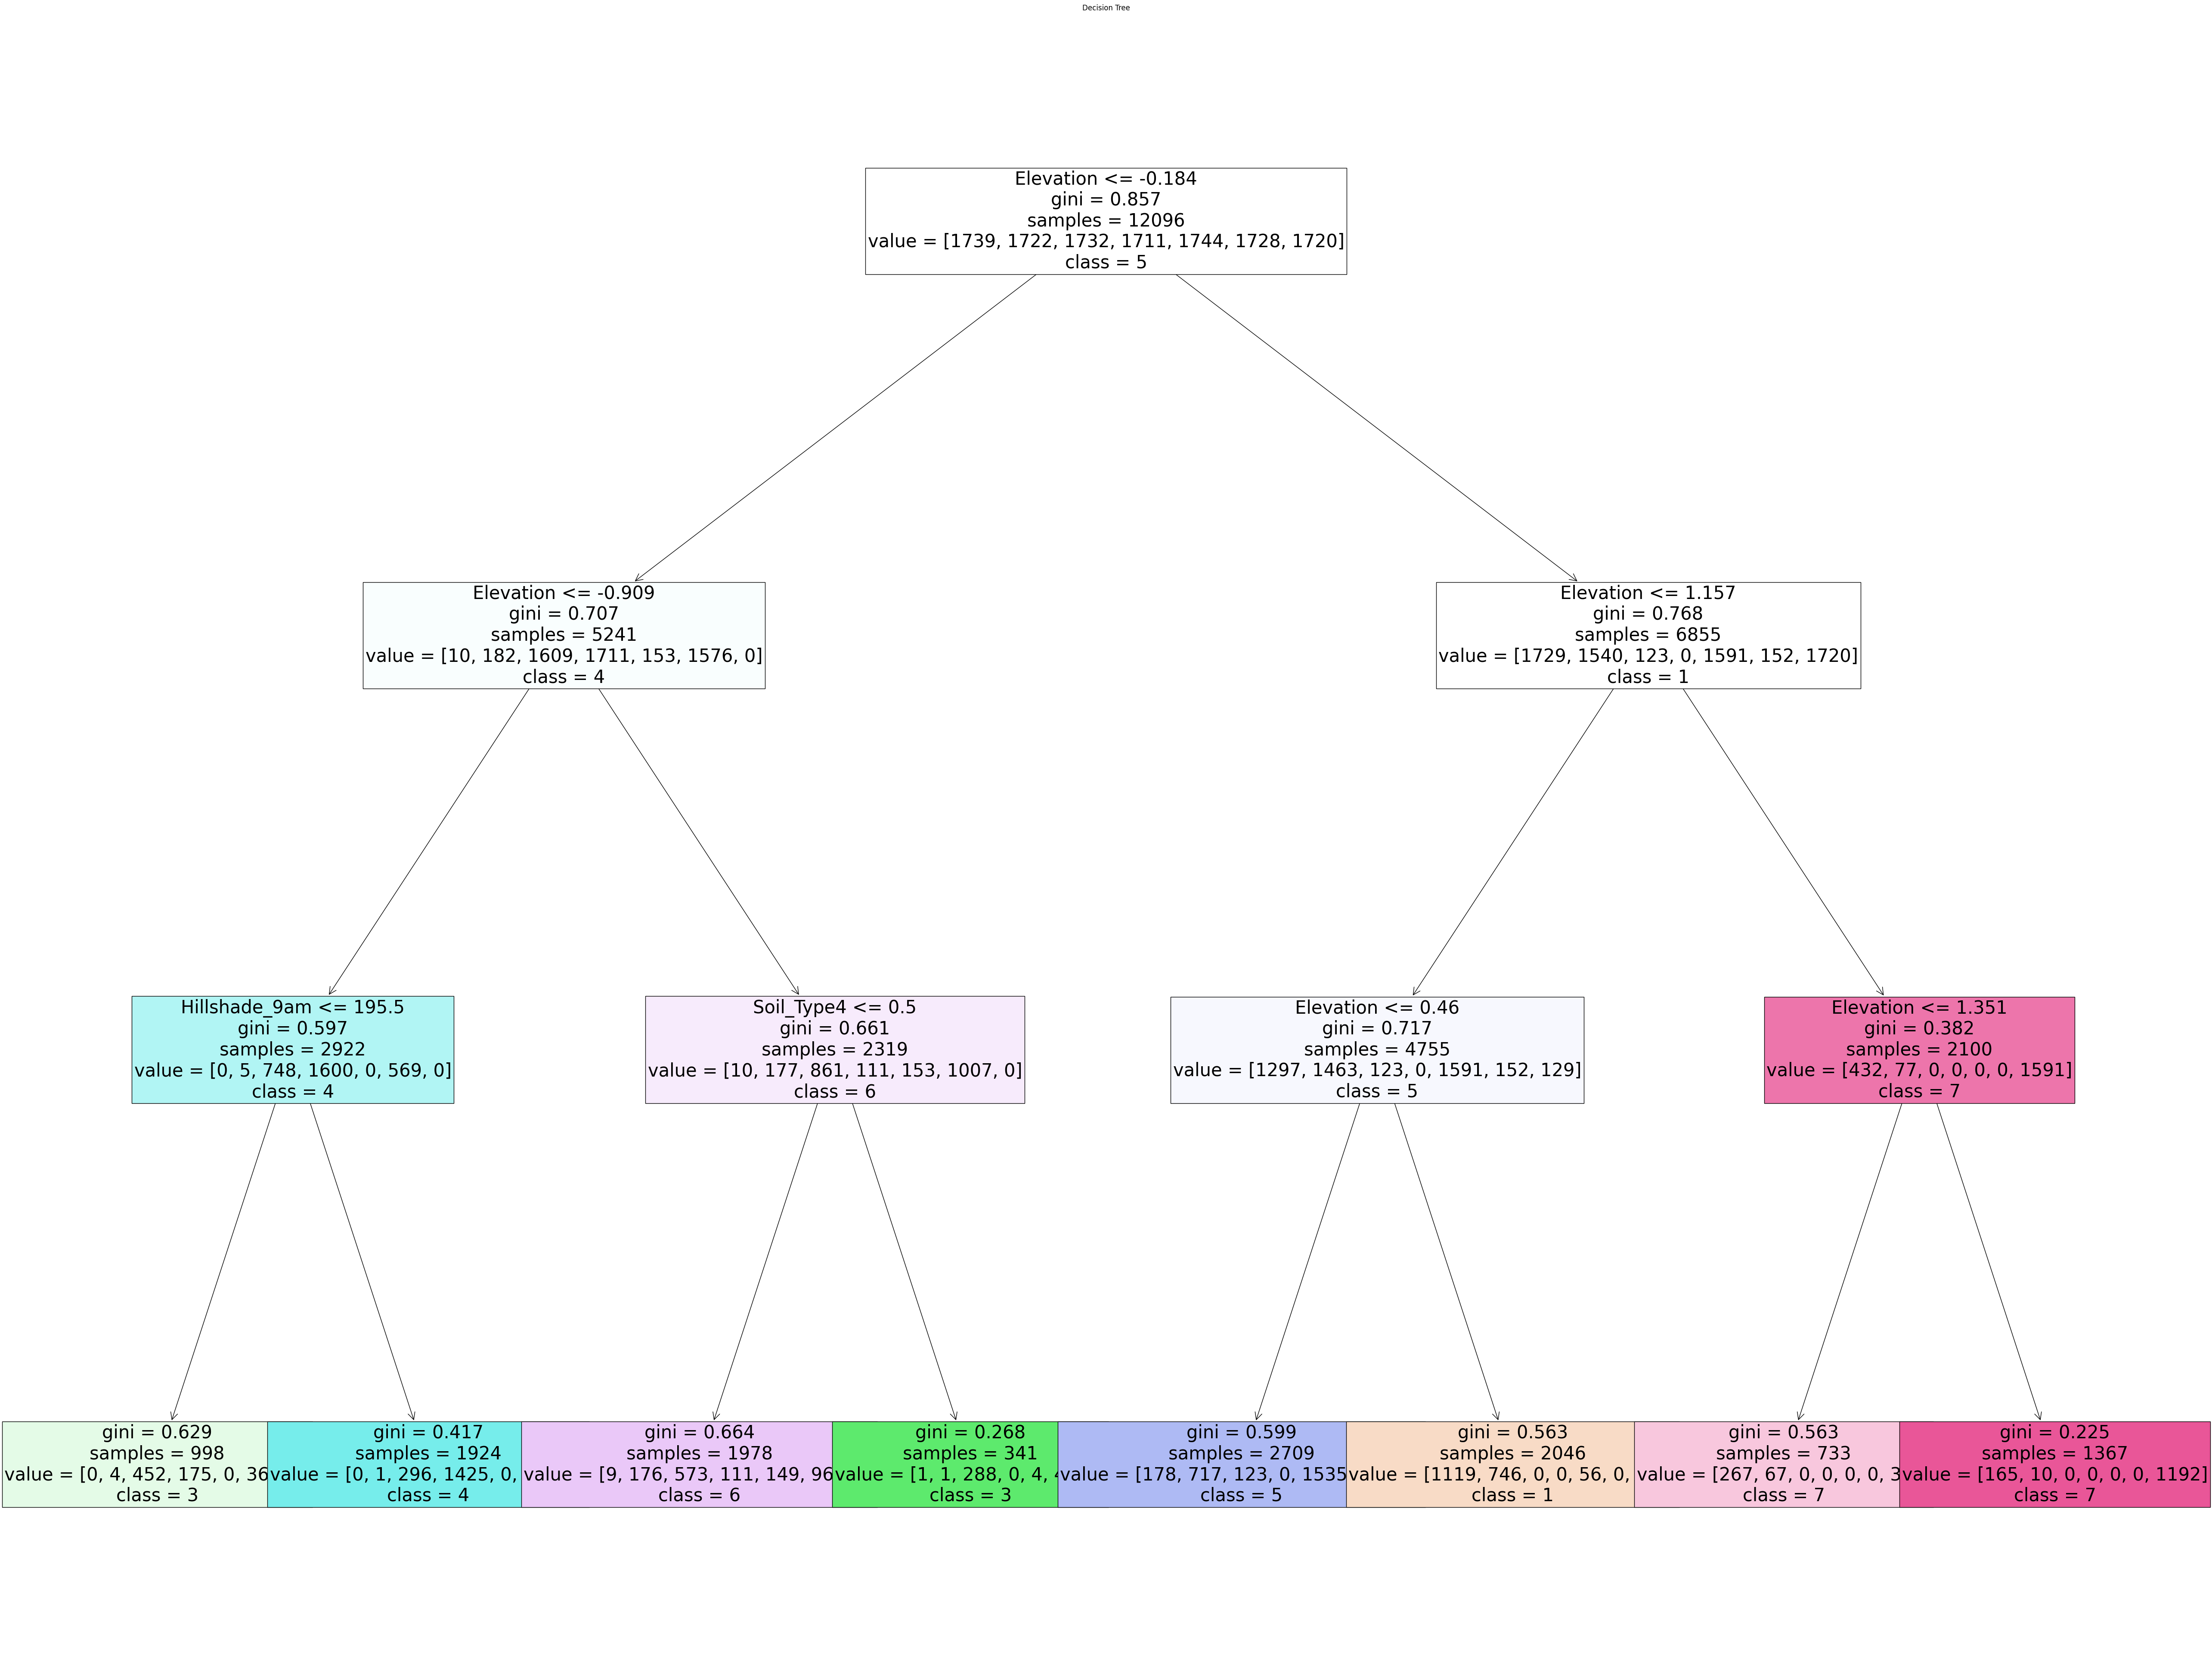

In [37]:

plt.figure(figsize=(65,50))
plot_tree(tree_classifier, filled=True, feature_names=X.columns.tolist(), class_names=['1','2','3','4','5','6','7'], fontsize=30)
plt.title("Decision Tree")
plt.show()

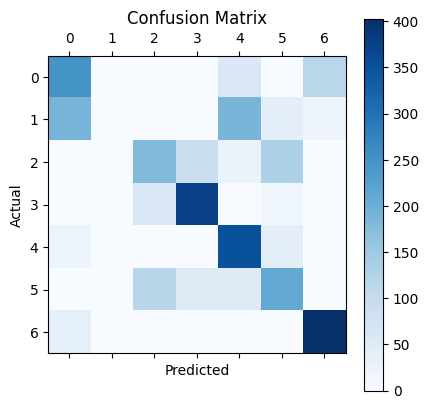

In [38]:

# Create the confusion matrix
matrix = confusion_matrix(y_test, y_pred4)
# Plot the confusion matrix
plt.matshow(matrix, cmap='Blues')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Loss Curve

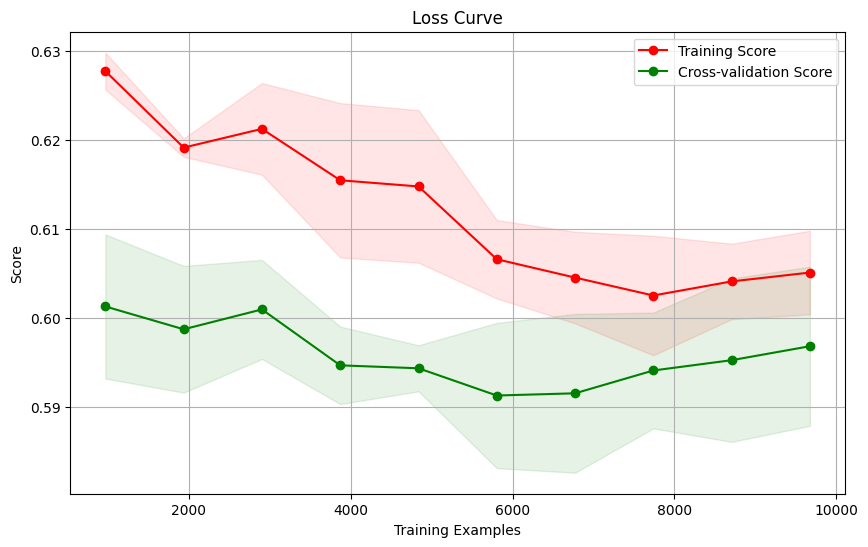

In [39]:
#for decision Tree
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(tree_classifier, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)


plt.figure(figsize=(10, 6))
plt.title("Loss Curve")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.grid()

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation Score")
plt.legend(loc="best")

plt.show()

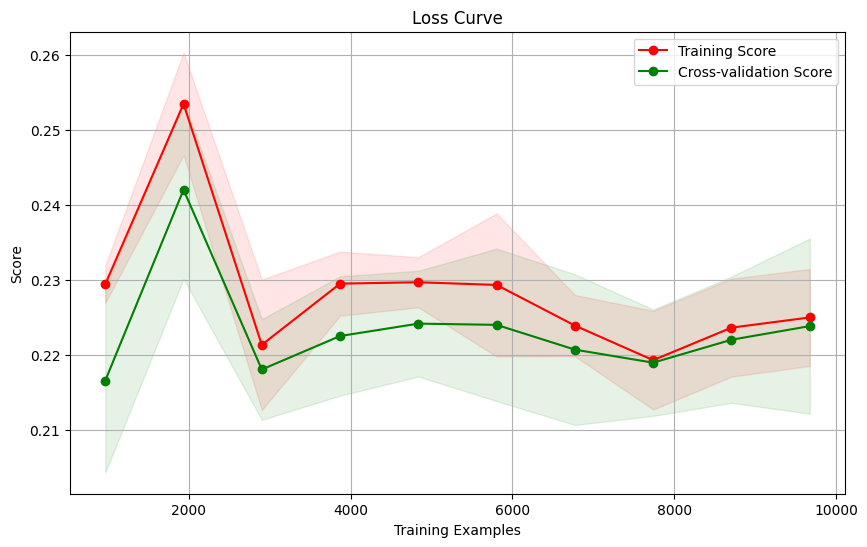

In [40]:
#for Logistic regression



train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)


plt.figure(figsize=(10, 6))
plt.title("Loss Curve")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.grid()

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation Score")
plt.legend(loc="best")

plt.show()

In [ ]:
#for knn


train_sizes, train_scores, test_scores = learning_curve(knn , X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)


plt.figure(figsize=(10, 6))
plt.title("Loss Curve")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.grid()

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation Score")
plt.legend(loc="best")

plt.show()

In [ ]:
#for random_forest


train_sizes, train_scores, test_scores = learning_curve(nb_model , X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)


plt.figure(figsize=(10, 6))
plt.title("Loss Curve")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.grid()

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation Score")
plt.legend(loc="best")

plt.show()

In [ ]:
#for xgboosting


train_sizes, train_scores, test_scores = learning_curve(xgb, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)


plt.figure(figsize=(10, 6))
plt.title("Loss Curve")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.grid()

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation Score")
plt.legend(loc="best")

plt.show()

# Objective
The objective of this project was to develop a predictive model to classify seven forest cover types in four wilderness areas of the Roosevelt National Forest, Colorado, using provided geospatial and ecological data.

## 1. Data Analysis
## Dataset Overview

Total Features: 55 columns (10 numerical features, 44 binary categorical features, and 1 target column)

Target Variable: Cover_Type (seven categories represented by integers 1–7)

Data Type Check: All features were correctly identified as numerical or categorical.

Missing Values: No missing values were detected in the dataset.

Skewness Analysis:
1. Many numerical features displayed high skewness.
2. Applied standardization to mitigate the effect of skewness.
   
## Exploratory Data Analysis
Distribution Plots: Visualized distributions for numerical features to understand the spread and skewness of the data.

Heatmap: Highlighted correlations among continuous variables.

1. Features like Elevation, Aspect, and Slope were moderately correlated with the target variable.
   
Boxplots: Examined feature distributions across different forest cover types.

# 2. Feature Engineering
Feature Scaling: Standardized numerical features using StandardScaler.

Feature Importance Analysis:
1. Employed ExtraTreesClassifier to rank feature importance.
2. Identified the top 9 most influential features for prediction.
3. Visualized feature importance to guide model development.


# 3. Model Development
Implemented multiple machine learning algorithms to evaluate performance. Below are the models and their key results:

## Model 1: XGBoost Classifier
Accuracy: High

Classification Report:

Precision and recall were consistent across classes.

Strengths: Captures complex patterns and relationships.

Confusion Matrix: Demonstrated strong prediction performance across all cover types.

## Model 2: Random Forest Classifier

Accuracy: Very high, comparable to XGBoost.

Strengths: Robust and handles imbalanced data well.

Feature Importance: Provided a clear ranking of influential features.

Confusion Matrix: Showed consistent accuracy for all cover types.

## Model 3: K-Nearest Neighbors (KNN)

Accuracy: Moderate.

Limitations: Computationally expensive for large datasets.

Confusion Matrix: Indicated poor performance for some classes.

## Model 4: Logistic Regression

Accuracy: Low.

Limitations: Could not capture the complexity of the dataset due to linear 
decision boundaries.

Confusion Matrix: Poor prediction for most cover types.

## Model 5: Decision Tree Classifier

Accuracy: Moderate.

Visualized Decision Tree: Helped understand feature splits and relationships.

Limitations: Tended to overfit.

In [1]:
# 4. Model Comparison
### Model	                     Accuracy	                 Strengths	                                    Weaknesses
#XGBoost Classifier	              High	           Handles large datasets and complex patterns	     Computationally expensive

#Random Forest Classifier	      High	           Handles imbalanced data, robust	                 Computationally intensive for large trees

#K-Nearest Neighbors (KNN)	    Moderate	       Simple to implement	                             Poor scalability, sensitive to noisy data

#Logistic Regression	              Low	           Simple and interpretable	                         Limited to linear relationships

#Decision Tree Classifier	    Moderate	       Easy to visualize	                             Prone to overfitting

# 5. Challenges and Solutions

## 1.High Dimensionality of Data:
Challenge: 44 binary features increased the dimensionality and sparsity.

Solution: Identified top features using ExtraTreesClassifier.
## 2.Imbalanced Distribution of Classes:
Challenge: Cover types were not evenly distributed.

Solution: Random oversampling during training.
## 3.Skewed Numerical Features:
Challenge: Some numerical features were highly skewed.

Solution: Standardized features to ensure uniform scaling.
## 4.Model Overfitting:
Challenge: Decision tree models overfit the training data.

Solution: Limited maximum depth and increased min_samples_split.

# 6. Recommendations
Best Model: Based on accuracy and performance, the Random Forest Classifier is recommended for deployment.
#### Future Enhancements:
Use hyperparameter tuning (e.g., GridSearchCV) to improve model performance further.

Explore ensemble methods combining XGBoost and Random Forest for better results.

Evaluate other dimensionality reduction techniques, like PCA, for high-dimensional data.
# 7. Conclusion
The project successfully demonstrated a workflow for analyzing and predicting forest cover types using machine learning models. The Random Forest Classifier provided the best balance of accuracy, interpretability, and computational efficiency.






